In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from udisc_stats import (
    preprocess,
    get_year_stats,
    moving_avg,
    get_score_avg,
    get_score_counts,
    get_player_stats,
    print_segments
)

In [2]:
orig_df = pd.read_csv("~/Downloads/Udisc Scorecards.csv")

orig_df.head()

,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,...,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28
0,Par,Bryan Park,Yellows Tees,2022-06-04 16:06,58,NaN,3,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monkey,Bryan Park,Yellows Tees,2022-06-04 16:06,55,-3.0,3,4,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Par,Bryan Park,Paver Tees,2022-06-04 10:23,58,NaN,3,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Monkey,Bryan Park,Paver Tees,2022-06-04 10:23,57,-1.0,2,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bryan Der,Bryan Park,Paver Tees,2022-06-04 10:23,67,9.0,4,3,4,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = preprocess(orig_df)

df.head()

,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,...,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28,LayoutNameAdj,Year
0,Par,Bryan Park,Yellows Tees,2022-06-04 16:06:00,58,NaN,3,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2022
1,Monkey,Bryan Park,Yellows Tees,2022-06-04 16:06:00,55,-3.0,3,4,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2022
2,Par,Bryan Park,Paver Tees,2022-06-04 10:23:00,58,NaN,3,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paver Tees,2022
3,Monkey,Bryan Park,Paver Tees,2022-06-04 10:23:00,57,-1.0,2,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paver Tees,2022
4,Bryan Der,Bryan Park,Paver Tees,2022-06-04 10:23:00,67,9.0,4,3,4,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paver Tees,2022


In [4]:
print_segments(df)

Players: ['Par', 'Monkey', 'Bryan Der', 'Riley', 'Sam Forsyth', 'Scott', 'James M.', 'Noah', 'Austin', 'Bryce', 'John Farmer', 'Tyler', 'Hitesh', 'Glasser', 'David', 'Patty Ice ']
Courses: ['Bryan Park', 'Dorey Park', 'Gillies Creek Park', 'Dunncroft - Castle Point Park', "Bird's Ruins DGC", 'THE Diavolo DGC @ New Hope Park', 'University Of Richmond', 'Bluemont Park', 'Elver Park']
Layouts: ['Yellows Tees', 'Paver Tees', 'White - Short Tees', 'Main', 'Red - Short Tees', 'Shorts then Longs', 'Shorts To Shorts', 'Back 9', 'Blue - Long Tees', 'Diavolo White', 'Chainbangers’ 18', 'Short tees Red baskets', 'Front 9 ']


In [8]:
get_year_stats(df)

,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,...,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28
0,Austin,Bryan Park,Yellows Tees,2022,89.000000,31.000000,4.000000,5.000000,5.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bryan Der,Bryan Park,Paver Tees,2021,72.000000,14.000000,4.000000,4.000000,4.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bryan Der,Bryan Park,Paver Tees,2022,68.444444,10.444444,3.777778,3.666667,4.555556,4.777778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bryan Der,Bryan Park,Yellows Tees,2021,67.720000,9.720000,3.360000,3.840000,3.600000,4.720000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bryan Der,Bryan Park,Yellows Tees,2022,63.750000,7.333333,3.083333,3.583333,3.833333,4.583333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Tyler,Bryan Park,Paver Tees,2021,67.000000,9.000000,3.000000,4.000000,4.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Tyler,Bryan Park,Yellows Tees,2021,68.333333,10.333333,3.000000,3.666667,4.000000,4.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Tyler,Dorey Park,White - Short Tees,2020,57.000000,2.000000,3.000000,4.000000,3.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Tyler,Dunncroft - Castle Point Park,Shorts then Longs,2020,31.000000,-2.000000,2.000000,2.000000,2.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yearly Stats for Monkey at Bryan Park from the Paver Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,...,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28
25,Monkey,Bryan Park,Paver Tees,2020,63.583333,15.375000,3.583333,4.166667,4.083333,4.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Monkey,Bryan Park,Paver Tees,2021,68.818182,10.818182,3.454545,3.545455,3.954545,4.454545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Monkey,Bryan Park,Paver Tees,2022,61.947368,3.947368,3.000000,3.210526,3.368421,3.894737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


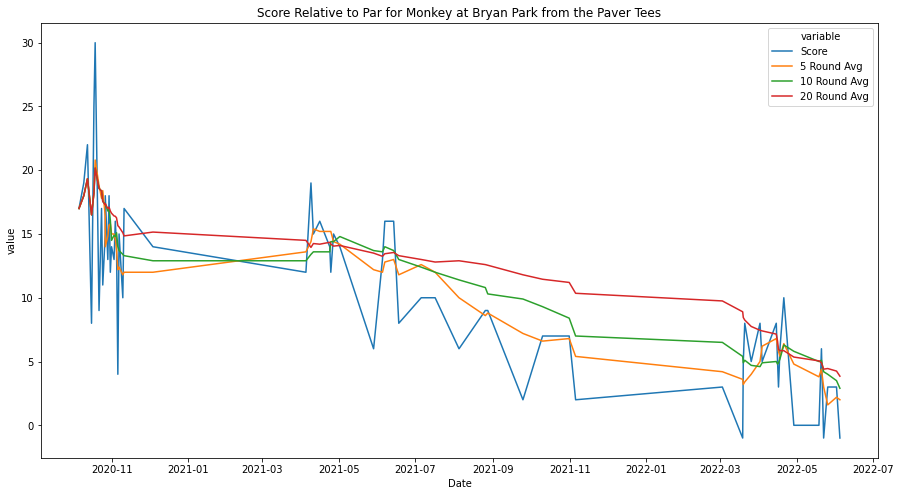

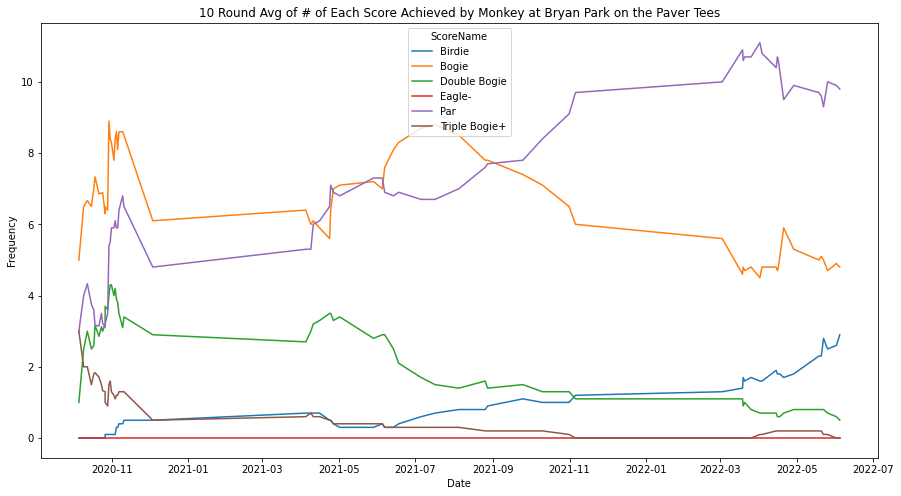

In [5]:
get_player_stats(
    df=df,
    player="Monkey",
    course="Bryan Park",
    layout="Yelows Tees",
)

Yearly Stats for Bryan Der at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,...,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28
3,Bryan Der,Bryan Park,Yellows Tees,2021,67.72,9.720000,3.360000,3.840000,3.600000,4.720000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bryan Der,Bryan Park,Yellows Tees,2022,63.75,7.333333,3.083333,3.583333,3.833333,4.583333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


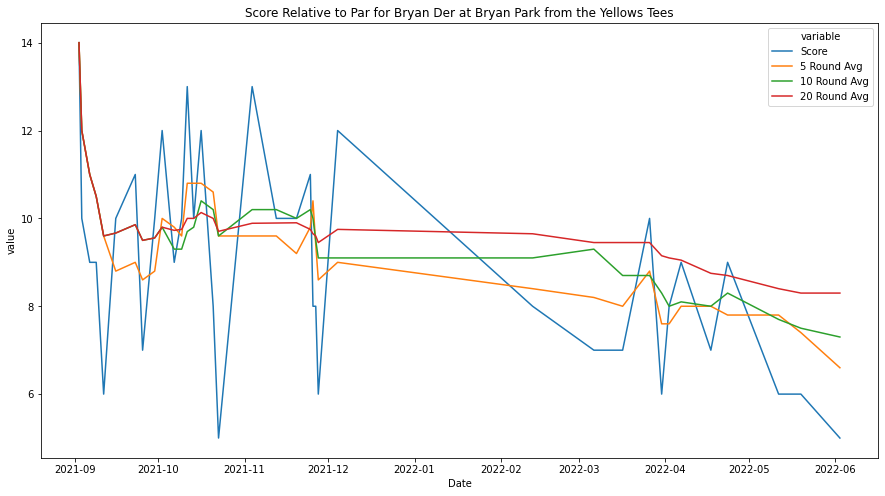

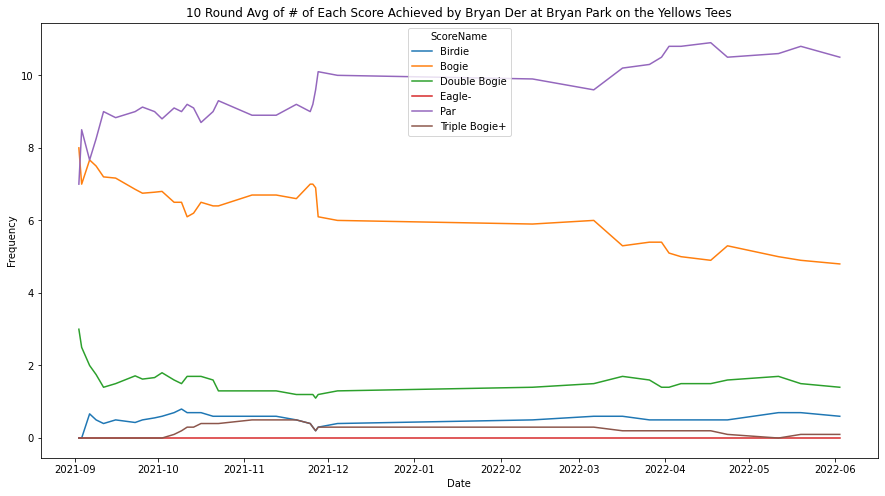

In [6]:
get_player_stats(
    df=df,
    player="Bryan Der",
    course="Bryan Park",
    layout="Yellows Tees",
)

Yearly Stats for Riley at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,...,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28
77,Riley,Bryan Park,Yellows Tees,2021,77.250000,19.250000,4.000000,4.000000,4.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Riley,Bryan Park,Yellows Tees,2022,69.222222,11.222222,3.666667,3.333333,3.888889,4.888889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


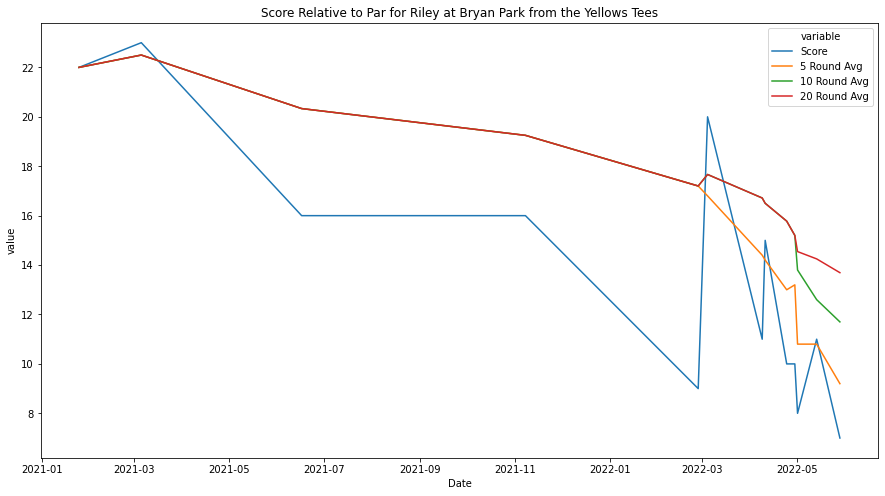

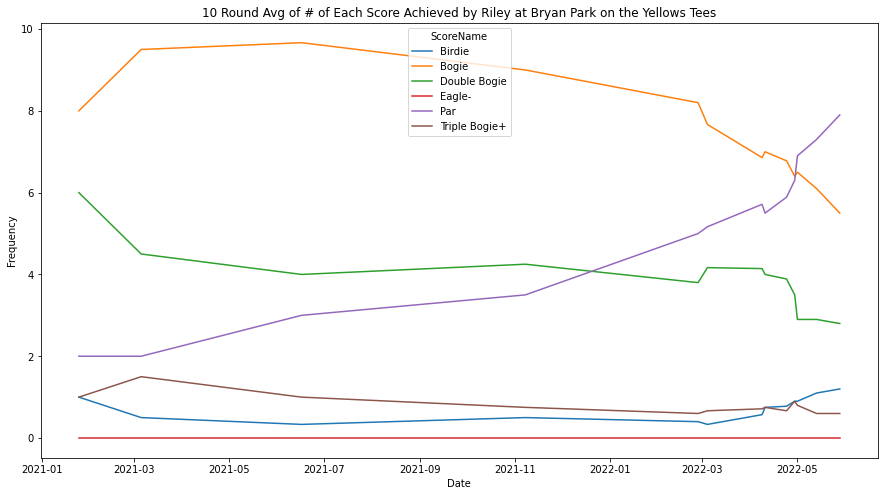

In [7]:
get_player_stats(
    df=df,
    player="Riley",
    course="Bryan Park",
    layout="Yellows Tees",
)